# DTEK0042 Exercise 4
    Group Members:
    1. Juha, Virta
    2. Amin, Rezaei
    3. YU-HAO, TSAI

*** Note for Google Colab Users ***
     Because Google Colab doesn't have a button to convert your notebook to .html format here is a quick work around:
   1. open a new google colab notebook
   2. in the files section in google colab, upload the .ipynb file you want to be converted to .html
   3. in your new open notebook run this command in an empty cell: !jupyter nbconvert --to html YourFileName.ipynb
   4. after the command is finished running refresh the page
   5. In your files section you should see your original .ipynb file that you uploaded and then a .html file of that same notebook.
   6. download the .html file and you're good to go!

In this exercise, you are required to analyze a SCG signal step-by-step as outlined below.  The deliverables for this exercise are a jupyter notebook and a .html file exported form the notebook. The notebook should includes your code, observations, graphs, and conclusions made upon analyzing the given SCG signals. Please provide caption and description for every figure. 

## 1- library Imports

In [1]:
#scipy imports
#import scipy 
from scipy import signal,stats
#from scipy.signal import butter, filtfilt, freqz

#numpy imports
import numpy as np

#matplotlib imports
import matplotlib.pyplot as plt

#pandas imports
import pandas as pd

#sklean imports
from sklearn.decomposition import PCA
from sklearn import preprocessing as prep
#other imports
from glob import glob

# Data Import 
* Load the .txt files of SCG data that are stored in the folder named “dataset” into your python environment.  
* For each .txt data file, select the 3rd column which contains the Z-axis of the SCG signals. 
* Note: the sampling frequency of this signal is 200 Hz. 

        Hint:  
        * to automate the loading process you can get a list of all data file paths using glob package and subsequently load the files in a for loop. 
        
        * dataFiles = glob.glob(path_to_dataset) to get a list of file paths of "dataset\xxdata.txt"
        
         then load the paths one by one in a loop

In [2]:
fs=200 #samp freq

dataFiles = glob('dataset\*.txt')

Noisy_Z = []
Normal_Z = []

###_Load noisy data and name it accordingly_###
for i in range(1,5):
    Noisy_Z.append(np.loadtxt(dataFiles[i-1], delimiter =" ") [:,2])
    
print('Z-axis of Noisy_data loaded as Noisy_Z')

###_Load normal data and name it accordingly_###
for i in range(1,5):
    Normal_Z.append(np.loadtxt(dataFiles[i+3], delimiter = " ") [:,2])
    
print('Z-axis of Normal_data loaded as Normal_Z')

Z-axis of Noisy_data loaded as Noisy_Z
Z-axis of Normal_data loaded as Normal_Z


# Noisy Vs Normal Plotting

* Plot the z-axis SCG signal from the file "Noisy_data_1.txt" and plot the z-axis SCG signal from the file "Normal_data_1.txt" 
* Describe your observations and how the plots differ from one another.


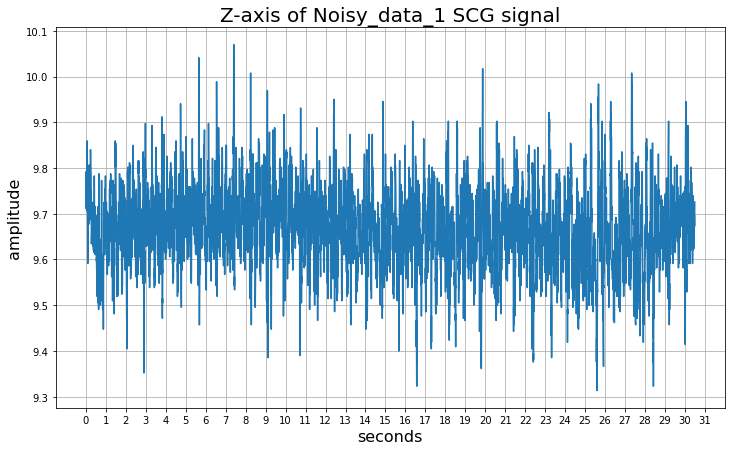

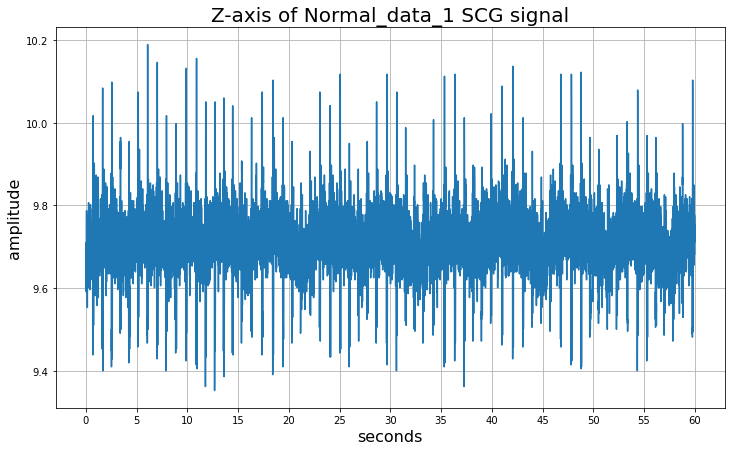

In [3]:
###_Plot the z-axis SCG signal from the file "Noisy_data_1.txt"_###

Noisy_data_1 = np.loadtxt(dataFiles[0], delimiter =" ")[:,2]
Normal_data_1 = np.loadtxt(dataFiles[4], delimiter =" ")[:,2]

#convert samples to time in seconds
seconds_time=np.linspace(0,(len(Noisy_data_1)/fs),len(Noisy_data_1))

plt.figure(figsize=(12,7))
plt.grid()
plt.plot(seconds_time, Noisy_data_1)
plt.title("Z-axis of Noisy_data_1 SCG signal",fontsize=20)
plt.xlabel("seconds",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.xticks(np.arange(0,(len(Noisy_data_1)/fs)+1,step=1))
plt.show()

###_Plot the z-axis SCG signal from the file "Normal_data_1.txt"_###

#convert samples to time in seconds
seconds_time=np.linspace(0,(len(Normal_data_1)/fs),len(Normal_data_1))

plt.figure(figsize=(12,7))
plt.grid()
plt.plot(seconds_time, Normal_data_1)
plt.title("Z-axis of Normal_data_1 SCG signal",fontsize=20)
plt.xlabel("seconds",fontsize=16)
plt.ylabel("amplitude",fontsize=16)
plt.xticks(np.arange(0,(len(Normal_data_1)/fs)+1,step=5))
plt.show()

# Data Segmentation 
* Here is a simple function to use for data segmentation
* Segment the Z-axis signals into 5-second segments
* The sampling frequency used to record these signals is 200 Hz.
* Store the segments and the accompanying labels

In [4]:
#code (provided)

def _slicing(sig, file_label, segment_length = 1000):
    
    """
    inputs:
    sig : input array to be segmented
    file_label : label to be applied to segmented signal
    segment_length : Length in samples of the segments produced from the input signal
    
    outputs:
    sig_sliced : a list of segments
    label : a list of corresponding labels for the segmented signal 
    
    """

    sig_sliced = []
    label = []
    
    # slicing 
    
    for i in np.arange(int(len(sig)/segment_length)):
        #changed sig_sliced.append() to sig_sliced.extend()
        sig_sliced.append( sig[i*segment_length:(i+1)*segment_length] )

        label.append(file_label)
        
    return (sig_sliced , label)


# Feature Extraction Function Creation
*  Define a function and name it “feature_extraction” in which you compute and return the features listed below
    * *Time Domain Features*:  mean, standard deviation, interquartile-range, median, peak-to-peak range, skewness, kurtosis, and root mean square. 
    * *Frequency Domain Features*: power spectral density (using welch function of scipy)
    
        * For power spectral density, Calculate the total power spectral density within frequency bins of 4 Hz steps. Discard the frequencies above 40 Hz. Get the power within each bin.
    
        Hint:
        
        Reference: https://docs.scipy.org/doc/scipy/reference/stats.html for skewness, kurtosis, interquartile-range(iqr)
        
        Reference: https://numpy.org/doc/stable/reference/routines.statistics.html for other time domain features
        
        Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html for transforming to zero mean and unit variance



In [5]:
#code
def feature_extraction(sig, fs = 200):
    
    
    """
    inputs:
    sig : input array to extract features from
    fs : sampling frequency of input array

    
    outputs:
    feature_array: an array containing all the features extracted from the signal 
    """
    
    
    ###_Statistical features - time domain_###
    mean = np.mean(sig)
    std = np.std(sig)
    iqr = stats.iqr(sig)
    median = np.median(sig)
    p2p_range = np.ptp(sig)
    skewness = stats.skew(sig)
    kurtosis = stats.kurtosis(sig)
    rms = np.sqrt(np.mean(np.power(sig,2)))
      
    ###_PSD_###
    # transforming to zero mean and unit variance -- only do this when extracting PSD
    # Hint: transfromed_sig = function_for_scale(sig)
    
    transformed_sig = prep.scale(sig, axis=0, with_mean=True, with_std=True)
    
    frequencies , PSD = signal.welch(transformed_sig, fs)
    
    freqs_arr = np.arange(0,41,4)
    
    PSD_binned_sum = [] 
    
    for i in range(freqs_arr.shape[0]-1): 
        
        PSD_binned_sum.append (np.sum(PSD[np.where( (frequencies >= freqs_arr[i] ) & 
                                                   ( frequencies < freqs_arr[i+1] ) )]) )
        
    
    # return the feature array
    return (mean, std, iqr, median, p2p_range, skewness, kurtosis, rms, *PSD_binned_sum)
 
#create test signal to test feature extraction
test_sig = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
print('test_sig ', test_sig)

#test feature extraction on test signal
features = feature_extraction(test_sig)
print('features of test signal')
print(features)
print('mean: ', features[0])
print('std: ', features[1])
print('iqr: ', features[2])
print('median: ', features[3])
print('p2p: ', features[4])
print('skewness: ', features[5])
print('kurtosis: ', features[6])
print('rms: ', features[7])
print('PSD_binned_sum: ', features[8:18])

test_sig  [1 2 3 4 5 6 7 8 9]
features of test signal
(5.0, 2.581988897471611, 4.0, 5.0, 8, 0.0, -1.2300000000000002, 5.627314338711377, 0.001125000000000001, 0.0, 0.0, 0.0, 0.0, 0.010978616793536589, 0.0, 0.0, 0.0, 0.0)
mean:  5.0
std:  2.581988897471611
iqr:  4.0
median:  5.0
p2p:  8
skewness:  0.0
kurtosis:  -1.2300000000000002
rms:  5.627314338711377
PSD_binned_sum:  (0.001125000000000001, 0.0, 0.0, 0.0, 0.0, 0.010978616793536589, 0.0, 0.0, 0.0, 0.0)


D:\mLearn\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 9, using nperseg = 9
  warnings.warn('nperseg = {0:d} is greater than input length '


# Feature Extraction Application

* You must first segment your signals and then extract features from each segment. You could do it in the following way:



* Call the _slicing function to section all the z-axis data into 5-second segments
        Hint: Load each file in "dataFiles" with for-loop
* Use the feature extraction function you created and extract features from every segment that you have obtained.
* Store the labels and the features you extracted from each segment to numpy arrays. 
        Hint: Think of an easy way to extract the label "noisy" or "normal" from each file name
        str.split() could be used somehow in this case

In [6]:
#"""###_instructors version to load data_###
features = []
labels = []

for elm in dataFiles:
    tmp_label = []
    z_axis = np.loadtxt(elm)[:,2]
    tmp_label.append(elm.split('\\')[1][0:6])
    
    if "Noisy_" in tmp_label:
        my_label = "Noisy"
    else:
        my_label = "Normal"
    
    sig_sliced, label = _slicing(z_axis, file_label=my_label)
    for _slice in sig_sliced:
        features.append(feature_extraction(_slice))
    for label in label:
        labels.append(label)

# Standardize Features
Hint:

    Use sklearn.preprocessing.scale() to standardize the features
    Reference: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

In [7]:
standardised_features = []
for elm in features:
    #print(elm)
    standardised_features.append(prep.scale(elm))


# Principal Component Analysis
* Principal Component Analysis (PCA) is used to reduce the dimensionality of a data set consisting of many variables correlated with each other. This can then be used to visualize the data in a more practical way. 
* Compute the first and 2nd principal components
* Plot the two components on a scatter plot with the coloring done by label
* Are these features useful to seperate the two types of signals (noisy vs normal)?
* Describe your observations.
    
        Hint:
        my_pca=PCA(n_components=2)
        pca_out = my_pca.fit_transform(input)

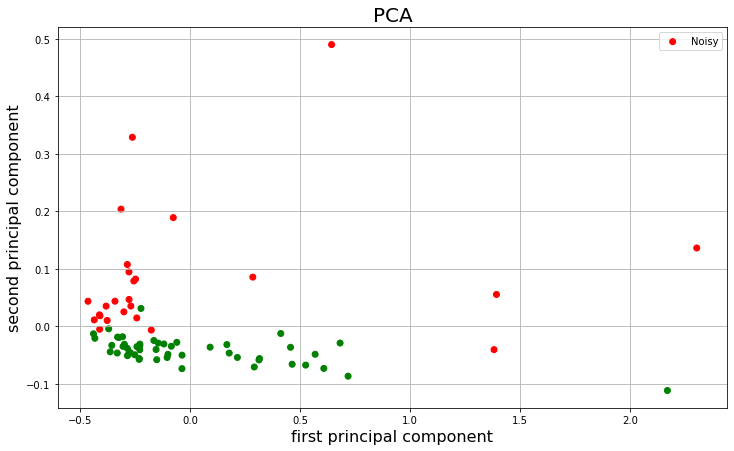

In [8]:
first_PC = []
second_PC = []

my_pca = PCA(n_components=2)
pca_out = my_pca.fit_transform(standardised_features)

for elm in pca_out:
    first_PC.append(elm[0])
    second_PC.append(elm[1])

df = pd.DataFrame(dict(first_principal_component=first_PC, second_principal_component=second_PC, label=labels))
colors = {'Noisy':'red', 'Normal':'green'}

plt.figure(figsize=(12,7))
plt.grid()
plt.scatter(df['first_principal_component'], df['second_principal_component'], c=df['label'].map(colors))
plt.title("PCA",fontsize=20)
plt.xlabel("first principal component",fontsize=16)
plt.ylabel("second principal component",fontsize=16)
plt.legend(labels, loc='best')
plt.show()

# Observations 
By appling the Principal Component Analysis, we can reduce the dimensionality of our data set. Which enables us to find out the difference and the trend of the noisy and normal siganl. We can focus on the component which present more about the normal signal so that we can be not disturbed by the noisy.